## calculating entropy and information gain

https://medium.com/@rishabhjain_22692/decision-trees-it-begins-here-93ff54ef134

In [1]:
import os
import pandas
import numpy as np


## our dataset - to play or not to play

In [2]:
df = pandas.read_csv("golf5.csv")
df

,outlook,temp,humidity,windy,play golf
0,rainy,hot,high,no,no
1,rainy,hot,high,yes,no
2,overcast,hot,high,no,yes
3,sunny,mild,high,no,yes
4,sunny,cool,normal,no,yes
5,sunny,cool,normal,yes,no
6,overcast,cool,normal,yes,yes
7,rainy,mild,high,no,no
8,rainy,cool,normal,no,yes
9,sunny,mild,normal,no,yes


## trivial examples

In [3]:
df = pandas.read_csv("golf1.csv")
df

,play golf,watch TV
0,9,5


In [4]:
# calc probabilities
df_probs = (df.T / df.sum(axis=1)).T
df_probs

,play golf,watch TV
0,0.642857,0.357143


In [5]:
# calc entropy 
# E = - p1 log2(p1) - p2 log2(p2)

def plogp(x):
    return -x * np.log2(x)

In [6]:
df_probs.apply(plogp, axis=1)


,play golf,watch TV
0,0.409776,0.53051


In [7]:
df_probs.apply(plogp, axis=1).sum(axis=1).sum()


0.9402859586706311

In [8]:
entropy0 = df_probs.apply(plogp, axis=1).sum(axis=1).sum()
entropy0

0.9402859586706311

In [9]:
# try it for only one possibility .. should get ZERO
df = pandas.read_csv("golf2.csv")
df

,play golf,watch TV
0,0,14


In [10]:
df_probs = (df.T / df.sum(axis=1)).T
df_probs

,play golf,watch TV
0,0.0,1.0


In [11]:
df_probs.apply(plogp, axis=1).sum(axis=1).sum()

/Users/amitbhattacharyya/miniconda3/envs/segments/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.0

In [12]:
## try it for uniform distribution .. should get ONE
df = pandas.read_csv("golf3.csv")
df

,play golf,watch TV
0,7,7


In [13]:
df_probs = (df.T / df.sum(axis=1)).T
df_probs

,play golf,watch TV
0,0.5,0.5


In [14]:
df_probs.apply(plogp, axis=1).sum(axis=1).sum()

1.0

## now for some actually trees

In [15]:
df = pandas.read_csv("golf4.csv", index_col='outlook')
df

,play golf,watch TV
outlook,,
sunny,3,2
overcast,4,0
rainy,2,3


In [16]:
df.sum(axis=1)

outlook
sunny       5
overcast    4
rainy       5
dtype: int64

In [17]:
df_outlook = df.sum(axis=1) / df.sum().sum()
df_outlook  


outlook
sunny       0.357143
overcast    0.285714
rainy       0.357143
dtype: float64

In [18]:
df_probs = df.T.divide(df.sum(axis=1), axis=1).T
df_probs

,play golf,watch TV
outlook,,
sunny,0.6,0.4
overcast,1.0,0.0
rainy,0.4,0.6


In [19]:
df_probs.apply(plogp, axis=1).sum(axis=1)

/Users/amitbhattacharyya/miniconda3/envs/segments/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


outlook
sunny       0.970951
overcast    0.000000
rainy       0.970951
dtype: float64

In [20]:
df_probs.apply(plogp, axis=1).sum(axis=1) * df_outlook

outlook
sunny       0.346768
overcast    0.000000
rainy       0.346768
dtype: float64

In [21]:
entropy_outlook = (df_probs.apply(plogp, axis=1).sum(axis=1) * df_outlook).sum()
entropy_outlook

0.6935361388961918

In [22]:
# information gain is difference in entropy
entropy0 - entropy_outlook

0.24674981977443933

## automate a little and compare to other splits 

In [23]:
df_all = pandas.read_csv("golf5.csv")
df_all['count'] = 1
df_all

,outlook,temp,humidity,windy,play golf,count
0,rainy,hot,high,no,no,1
1,rainy,hot,high,yes,no,1
2,overcast,hot,high,no,yes,1
3,sunny,mild,high,no,yes,1
4,sunny,cool,normal,no,yes,1
5,sunny,cool,normal,yes,no,1
6,overcast,cool,normal,yes,yes,1
7,rainy,mild,high,no,no,1
8,rainy,cool,normal,no,yes,1
9,sunny,mild,normal,no,yes,1


In [24]:
split_col = "outlook"
outcome_col = "play golf"
value_col = 'count'
df_split = df_all.pivot_table(columns=outcome_col, values=value_col, aggfunc=len )
df_split

play golf,no,yes
count,5,9


In [25]:
# calc entropy
def plogp(x):
    return -x * np.log2(x)

def entropy(df):
    
    df_aggregate = df.sum(axis=1) / df.sum().sum()
    #print(df_aggregate)
    df_probs = (df.T / df.sum(axis=1)).T
    #print (df_probs)
    e = (df_probs.apply(plogp, axis=1).sum(axis=1) * df_aggregate).sum()
    return e
    

In [26]:
entropy0 = entropy(df_split)
entropy0

0.9402859586706311

In [27]:
df_split

play golf,no,yes
count,5,9


In [28]:
split_col = "outlook"
outcome_col = "play golf"
value_col = 'count'
df_split = df_all.pivot_table(index=split_col, columns=outcome_col, values=value_col, aggfunc=len )
entropy(df_split)

0.6935361388961918

In [29]:
# loops over the splits
cols = ['outlook', 'temp', 'humidity', 'windy' ]
best_col = ''
max_info_gain = 0

for split_col in cols:
    df_split = df_all.pivot_table(index=split_col, columns=outcome_col, values=value_col, aggfunc=len )
    entropy_split = entropy(df_split)
    info_gain = entropy0 - entropy_split
    if info_gain > max_info_gain:
        max_info_gain = info_gain
        best_col = split_col
    print(split_col, entropy_split, info_gain)

print("")   
print("best >> ", best_col, max_info_gain)

outlook 0.6935361388961918 0.24674981977443933
temp 0.9110633930116763 0.02922256565895487
humidity 0.7884504573082896 0.15183550136234159
windy 0.8921589282623617 0.04812703040826949

best >>  outlook 0.24674981977443933


## try sklearn 

In [30]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


In [31]:
feature_cols = ['outlook', 'temp', 'humidity', 'windy' ]
label_col = 'play golf'
X = df_all[feature_cols].values
y = df_all[label_col]

X,y


(array([['rainy', 'hot', 'high', 'no'],
        ['rainy', 'hot', 'high', 'yes'],
        ['overcast', 'hot', 'high', 'no'],
        ['sunny', 'mild', 'high', 'no'],
        ['sunny', 'cool', 'normal', 'no'],
        ['sunny', 'cool', 'normal', 'yes'],
        ['overcast', 'cool', 'normal', 'yes'],
        ['rainy', 'mild', 'high', 'no'],
        ['rainy', 'cool', 'normal', 'no'],
        ['sunny', 'mild', 'normal', 'no'],
        ['rainy', 'mild', 'normal', 'yes'],
        ['overcast', 'mild', 'high', 'yes'],
        ['overcast', 'hot', 'normal', 'no'],
        ['sunny', 'mild', 'high', 'yes']], dtype=object),
 0      no
 1      no
 2     yes
 3     yes
 4     yes
 5      no
 6     yes
 7      no
 8     yes
 9     yes
 10    yes
 11    yes
 12    yes
 13     no
 Name: play golf, dtype: object)

In [32]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# For producing decision tree diagrams.
from IPython.core.display import Image, display
from six import StringIO
#from sklearn.externals.six import StringIO
import pydot

In [33]:
X2 = list()
for ii,cc in enumerate(feature_cols):
    le = LabelEncoder()
    le.fit(X.T[ii])
    X2.append(le.transform(X.T[ii]))

X2 = np.array(X2).T

le = LabelEncoder()
le.fit(y.T)
y2 = le.transform(y.T)

X2, y2

(array([[1, 1, 0, 0],
        [1, 1, 0, 1],
        [0, 1, 0, 0],
        [2, 2, 0, 0],
        [2, 0, 1, 0],
        [2, 0, 1, 1],
        [0, 0, 1, 1],
        [1, 2, 0, 0],
        [1, 0, 1, 0],
        [2, 2, 1, 0],
        [1, 2, 1, 1],
        [0, 2, 0, 1],
        [0, 1, 1, 0],
        [2, 2, 0, 1]]),
 array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0]))

In [34]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=3) # step 1 
dt.fit(X2, y2) # step 2

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [35]:
golf_predict= dt.predict(X2) # step 3
golf_predict

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0])

In [36]:
sum(golf_predict == y2) , len(y2)

(12, 14)

In [37]:
class_names = ['watch TV', 'play golf']

Output: golf.jpg


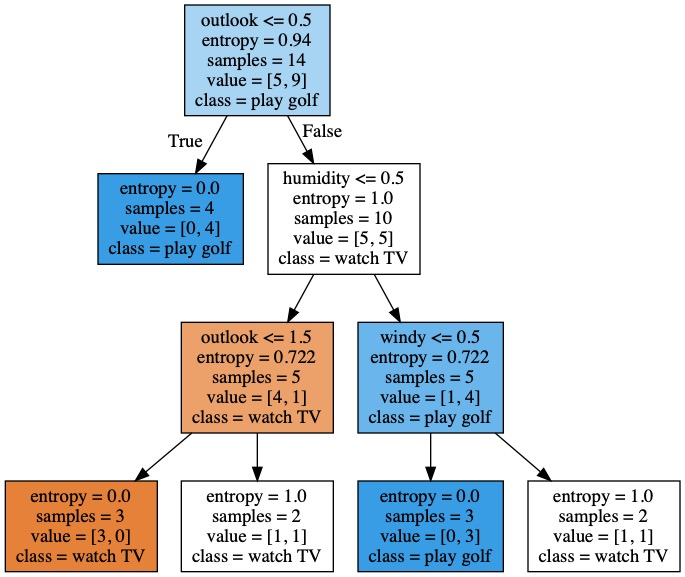

In [38]:
# Export the trained tree so we can look at it.
output_name = 'golf.jpg'
dot_data = StringIO()
tree.export_graphviz(dt, out_file=dot_data, feature_names=feature_cols, class_names=class_names,filled = True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]
graph.write_jpg(output_name)
print ('Output:', output_name)
display(Image(filename=output_name))

## one hot encoding of different states

In [39]:
feature_cols

['outlook', 'temp', 'humidity', 'windy']

In [40]:
df_all[feature_cols]

,outlook,temp,humidity,windy
0,rainy,hot,high,no
1,rainy,hot,high,yes
2,overcast,hot,high,no
3,sunny,mild,high,no
4,sunny,cool,normal,no
5,sunny,cool,normal,yes
6,overcast,cool,normal,yes
7,rainy,mild,high,no
8,rainy,cool,normal,no
9,sunny,mild,normal,no


In [41]:
X_dict = df_all[feature_cols].to_dict(orient='records')
X_dict

[{'outlook': 'rainy', 'temp': 'hot', 'humidity': 'high', 'windy': 'no'},
 {'outlook': 'rainy', 'temp': 'hot', 'humidity': 'high', 'windy': 'yes'},
 {'outlook': 'overcast', 'temp': 'hot', 'humidity': 'high', 'windy': 'no'},
 {'outlook': 'sunny', 'temp': 'mild', 'humidity': 'high', 'windy': 'no'},
 {'outlook': 'sunny', 'temp': 'cool', 'humidity': 'normal', 'windy': 'no'},
 {'outlook': 'sunny', 'temp': 'cool', 'humidity': 'normal', 'windy': 'yes'},
 {'outlook': 'overcast', 'temp': 'cool', 'humidity': 'normal', 'windy': 'yes'},
 {'outlook': 'rainy', 'temp': 'mild', 'humidity': 'high', 'windy': 'no'},
 {'outlook': 'rainy', 'temp': 'cool', 'humidity': 'normal', 'windy': 'no'},
 {'outlook': 'sunny', 'temp': 'mild', 'humidity': 'normal', 'windy': 'no'},
 {'outlook': 'rainy', 'temp': 'mild', 'humidity': 'normal', 'windy': 'yes'},
 {'outlook': 'overcast', 'temp': 'mild', 'humidity': 'high', 'windy': 'yes'},
 {'outlook': 'overcast', 'temp': 'hot', 'humidity': 'normal', 'windy': 'no'},
 {'outlook'

In [42]:
from sklearn.feature_extraction import DictVectorizer
# instantiate a Dictvectorizer object for X
dv_X = DictVectorizer(sparse=False) 
X_encoded = dv_X.fit_transform(X_dict)
X_encoded

array([[1., 0., 0., 1., 0., 0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0., 0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0., 0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1., 0., 0., 1., 1., 0.],
       [0., 1., 0., 0., 1., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0., 1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0., 0., 1., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0., 0., 1., 1., 0.],
       [0., 1., 0., 1., 0., 0., 0., 1., 0., 1.],
       [1., 0., 1., 0., 0., 0., 0., 1., 0., 1.],
       [0., 1., 1., 0., 0., 0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1., 0., 0., 1., 0., 1.]])

In [43]:
X_encoded.shape

(14, 10)

In [44]:
dv_X.vocabulary_

{'outlook=rainy': 3,
 'temp=hot': 6,
 'humidity=high': 0,
 'windy=no': 8,
 'windy=yes': 9,
 'outlook=overcast': 2,
 'outlook=sunny': 4,
 'temp=mild': 7,
 'temp=cool': 5,
 'humidity=normal': 1}

In [45]:
vocab = dv_X.vocabulary_
list(vocab.keys())

['outlook=rainy',
 'temp=hot',
 'humidity=high',
 'windy=no',
 'windy=yes',
 'outlook=overcast',
 'outlook=sunny',
 'temp=mild',
 'temp=cool',
 'humidity=normal']

## in class assignment
run decision tree on one hot encoded data

In [46]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=3) # step 1 
dt.fit(X_encoded, y2) # step 2

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [47]:
dt.predict(X_encoded) # step 3

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0])

In [48]:
feature_cols

['outlook', 'temp', 'humidity', 'windy']

In [49]:
vocab

{'outlook=rainy': 3,
 'temp=hot': 6,
 'humidity=high': 0,
 'windy=no': 8,
 'windy=yes': 9,
 'outlook=overcast': 2,
 'outlook=sunny': 4,
 'temp=mild': 7,
 'temp=cool': 5,
 'humidity=normal': 1}

In [50]:
list(vocab.keys())

['outlook=rainy',
 'temp=hot',
 'humidity=high',
 'windy=no',
 'windy=yes',
 'outlook=overcast',
 'outlook=sunny',
 'temp=mild',
 'temp=cool',
 'humidity=normal']

Output: golf.jpg


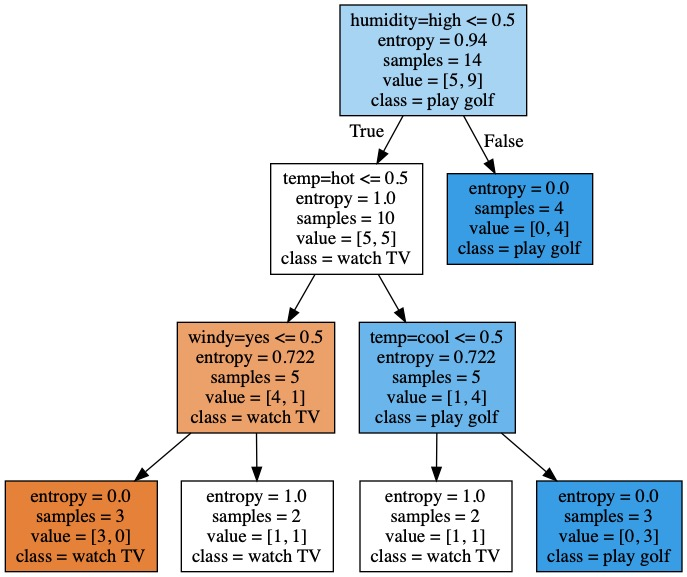

In [51]:
# Export the trained tree so we can look at it.
output_name = 'golf.jpg'
dot_data = StringIO()
#tree.export_graphviz(dt, out_file=dot_data, feature_names=feature_cols, class_names=class_names,filled = True)
tree.export_graphviz(dt, out_file=dot_data, feature_names=list(vocab.keys()), class_names=class_names,filled = True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]
graph.write_jpg(output_name)
print ('Output:', output_name)
display(Image(filename=output_name))

In [52]:
feature_names = sorted(vocab.keys())
feature_names

['humidity=high',
 'humidity=normal',
 'outlook=overcast',
 'outlook=rainy',
 'outlook=sunny',
 'temp=cool',
 'temp=hot',
 'temp=mild',
 'windy=no',
 'windy=yes']

Output: golf.jpg


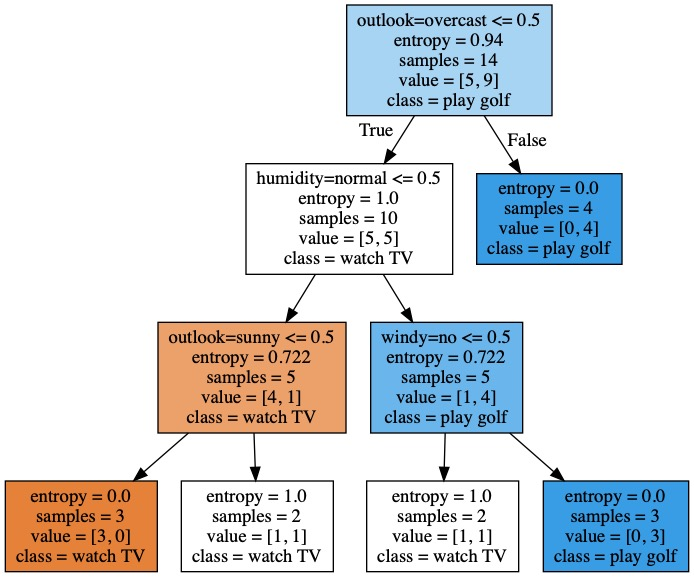

In [53]:
# Export the trained tree so we can look at it.
output_name = 'golf.jpg'
dot_data = StringIO()
tree.export_graphviz(dt, out_file=dot_data, feature_names=feature_names, class_names=class_names,filled = True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]
graph.write_jpg(output_name)
print ('Output:', output_name)
display(Image(filename=output_name))